# Item Sales Prediction

### Hypothesis: 
 - Location of the outlet directly affects the sales. Outlets in more densely populated areas might have better sales.
 - Older the establishment of sales, more are the sales. Age of store directly affects the sales. This is so because more established outlets might have good customer retention.
 - Average Price products have better sales. Compared to expensive and cheap products, average price range products might be sold more.
 - Popular the product, more the sales.
 - Basic necessity items would have higher sales. Eg; Vegetables and dairy items would have more sale comapred to non-edible and non-essential items.
 - Small or medium size outlets might have better sales than large outlets.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.style as style
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.offline as pyo
from scipy.stats import mode
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler,StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(8523, 12)

In [4]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

- There are 1559 unique products. This is too many. Hence, have to categorize them to reduce the uniqueness.
- Item MRP is more than number of items, hence different stores have different rates of same item.
- There are 16 item types. These will be categorized to reduce the uniqueness.

In [9]:
train_cat = [x for x in train.dtypes.index if train.dtypes[x] =='object']
for i in train_cat:
    print(train[i].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    279

- 'Low Fat','low fat' and 'LF' seems like same category i.e., Low fat
- 'Regular' and 'reg' are same i.e., Regular.
- Tier 3 location has more number of outlets.
- 65.4% outlets are Supermaarket type1.
- Only 10% of outlets are larger in size.

In [10]:
train_cat_ = train.select_dtypes(include='object')
train_ = [x for x in train_cat_.columns if (x != 'Item_Identifier') and (x != 'Outlet_Identifier')]
for i in train_:
    print(train.pivot_table(values=i, index = 'Outlet_Identifier', aggfunc =(lambda x :mode(x).mode[0])))

                  Item_Fat_Content
Outlet_Identifier                 
OUT010                     Low Fat
OUT013                     Low Fat
OUT017                     Low Fat
OUT018                     Low Fat
OUT019                     Low Fat
OUT027                     Low Fat
OUT035                     Low Fat
OUT045                     Low Fat
OUT046                     Low Fat
OUT049                     Low Fat
                               Item_Type
Outlet_Identifier                       
OUT010             Fruits and Vegetables
OUT013             Fruits and Vegetables
OUT017                       Snack Foods
OUT018             Fruits and Vegetables
OUT019                       Snack Foods
OUT027             Fruits and Vegetables
OUT035                       Snack Foods
OUT045             Fruits and Vegetables
OUT046             Fruits and Vegetables
OUT049                       Snack Foods
                  Outlet_Size
Outlet_Identifier            
OUT010                      

- Every Outlet sold more number of Low fat products than regular ones.
- Fruits and Vegetables and snacks are most sold products.
- Only OUT010 and OUT019 are grocery stores, which means they are smallest in size comapred to other outlets.

In [11]:
outlet_type_size = train.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_size

Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium

- Supermarket Type1 is also a 'small' size outlet, like grocery store.
- OUT010, OUT017 and OUT045 are either Grocery Stores or Supermarket type1. Hence they have 'small' outlet size. So, empty cells will be filled accordingly.

## Data Visualization

In [12]:
fig = make_subplots(2,1)

tr1=go.Box(x=train['Item_Outlet_Sales'],name='Item_Outlet_Sales',boxmean=True)
tr2=go.Histogram(x=train['Item_Outlet_Sales'],name='Item_Outlet_Sales Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Sales of Items in Outlets")
fig.show()

- Data is Right Skewed and has outliers. 
- Highest sale is above 13000.

In [13]:
fig = make_subplots(2,1)

tr1=go.Box(x=train['Item_MRP'],name='Item_MRP',boxmean=True)
tr2=go.Histogram(x=train['Item_MRP'],name='Item_MRP Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Price of Items")
fig.show()

In [14]:
fig = make_subplots(2,1)

tr1=go.Box(x=train['Item_Visibility'],name='Item_Visibility',boxmean=True)
tr2=go.Histogram(x=train['Item_Visibility'],name='Item_Visibility Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Visibility of Items")
fig.show()

In [15]:
fig = make_subplots(rows=2, cols=2,subplot_titles=('<b>Outlet_Size<b>','<b>Outlet_Location_Type','<b>Outlet_Type<b>'),
    vertical_spacing=0.09,specs=[[{"type": "pie","rowspan": 2},{"type": "pie"}],[None,{"type": "pie"}],])

fig.add_trace(go.Pie(values=train.Outlet_Size.value_counts().values,labels=['<b>Medium<b>','<b>Small<b>','<b>High<b>'],hole=0.3,
                     pull=[0,0.05]),row=1, col=1)

fig.add_trace(go.Pie(labels=['Tier 3','Tier 2','Tier 1'],
        values=train.Outlet_Location_Type.value_counts().values,
        pull=[0,0.05,0],hole=0.3),row=1, col=2)

fig.add_trace(go.Pie(labels=['Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2'],
                     values=train.Outlet_Type.value_counts().values,
        pull=[0,0,0.05,0],hole=0.3),row=2, col=2)

fig.update_layout(height=800,showlegend=True,title_text="<b>Distribution Of Gender And Different Card Statuses<b>",)
fig.show()

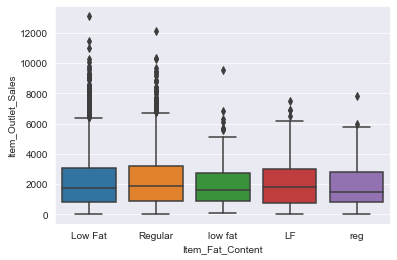

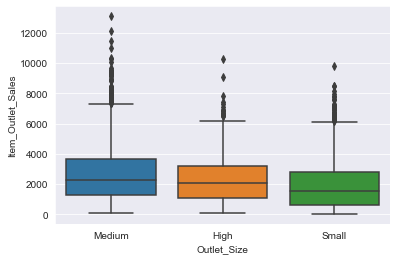

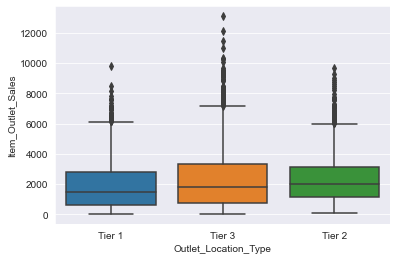

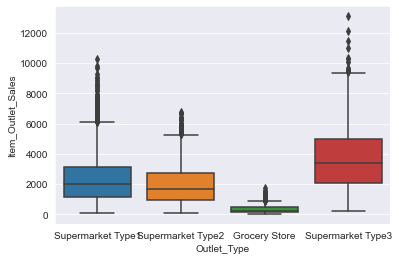

In [16]:
train_cat = [x for x in train.dtypes.index if train.dtypes[x] =='object']
train_cat = [x for x in train_cat if x not in ['Item_Identifier']]
for i in train_cat:
    sns.set_style('darkgrid')
    sns.boxplot(x=i, y= 'Item_Outlet_Sales', data=train)
    plt.show()

- All categories have outliers. 
- Treating outliers in Item Outlet Sale might solve problem of outliers as in overall.

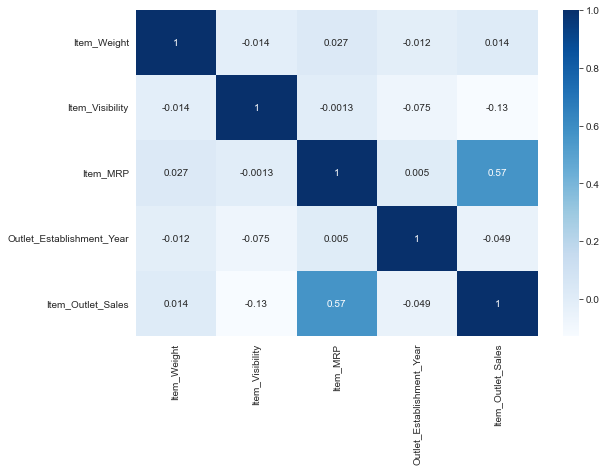

In [17]:
plt.figure(figsize = (9,6))
sns.heatmap(train.corr(), annot = True, cmap='Blues')
plt.show()

- Item_MRP is the only feature which is significantly correlated with Item_Outlet_Sales.
- Item_weight is least correlated with Item_Outlet_Sales.

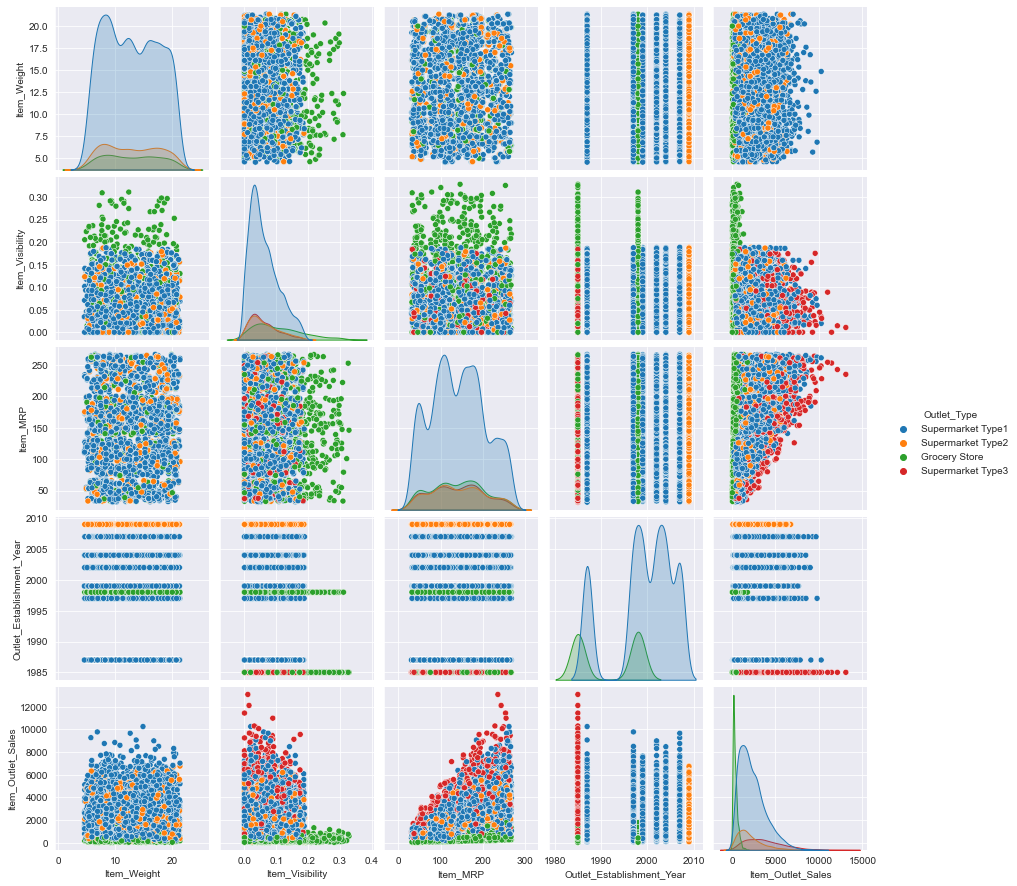

In [18]:
sns.pairplot(data=train, hue='Outlet_Type')

- There are some items which are only visible in Grocery Store and not in any other store.
- Supermarket Type2 are latest build outlets.
- Supermarket type1 has most visibility of items.
- Supermarket type3 is has consistency in sales of different MRP items.
- Surprisingly, it's the Grocery Store who had the highest sale (above 13000) of a particular item.

In [20]:
sns.lmplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Outlet_Type", data=train)

There is a linear relation between Item MRP and Item Outlet Sales to a certain extent.
With increase in Item MRP, sales of items increased as well.

## Feature Engineering

In [21]:
train['Outlet_Size'] = train['Outlet_Size'].fillna('unknown')
null_mask_size = train['Outlet_Size']=='unknown'
outlet_type_size.loc['Grocery Store'] = 'Small'
train.loc[null_mask_size, 'Outlet_Size'] = train.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_size.loc[x])
outlet_identifier_size = train.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_size

Outlet_Size
Outlet_Identifier            
OUT010                  Small
OUT013                   High
OUT017                  Small
OUT018                 Medium
OUT019                  Small
OUT027                 Medium
OUT035                  Small
OUT045                  Small
OUT046                  Small
OUT049                 Medium

In [22]:
test['Outlet_Size'] = test['Outlet_Size'].fillna('unknown')
null_mask_size = test['Outlet_Size']=='unknown'
outlet_type_size_ = test.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_size_.loc['Grocery Store'] = 'Small'
test.loc[null_mask_size, 'Outlet_Size'] = test.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_size.loc[x])
outlet_identifier_size_ = test.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))

In [23]:
print(train.pivot_table(values='Outlet_Type', index = 'Outlet_Location_Type', aggfunc =(lambda x :mode(x).mode[0])))
print(train.pivot_table(values='Outlet_Location_Type', index = 'Outlet_Type', aggfunc =(lambda x :mode(x).mode[0])))

                            Outlet_Type
Outlet_Location_Type                   
Tier 1                Supermarket Type1
Tier 2                Supermarket Type1
Tier 3                Supermarket Type3
                  Outlet_Location_Type
Outlet_Type                           
Grocery Store                   Tier 3
Supermarket Type1               Tier 2
Supermarket Type2               Tier 3
Supermarket Type3               Tier 3


- Grocery Stores are mostly in Tier 3 and Tier 3 has more number of Supermarket type3 as well. Hence, tier 3 is major(probably more populated) city or area.

In [24]:
print(train.pivot_table(values='Outlet_Size', index = 'Outlet_Location_Type', aggfunc =(lambda x :mode(x).mode[0])))
print(train.pivot_table(values='Outlet_Location_Type', index = 'Outlet_Size', aggfunc =(lambda x :mode(x).mode[0])))

                     Outlet_Size
Outlet_Location_Type            
Tier 1                     Small
Tier 2                     Small
Tier 3                    Medium
            Outlet_Location_Type
Outlet_Size                     
High                      Tier 3
Medium                    Tier 3
Small                     Tier 2


- Teir 1 and Teir 2 have Supermarket type 1 which are small in size.

In [25]:
print(train.pivot_table(values='Outlet_Location_Type', index = 'Item_Fat_Content', aggfunc =(lambda x :mode(x).mode[0])))

                 Outlet_Location_Type
Item_Fat_Content                     
LF                             Tier 3
Low Fat                        Tier 3
Regular                        Tier 3
low fat                        Tier 3
reg                            Tier 3


In [26]:
#replaced wrong entries
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(regex=[r'LF', 'low fat'], value='Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(regex=[r'reg'], value='Regular')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(regex=[r'LF', 'low fat'], value='Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(regex=[r'reg'], value='Regular')

In [27]:
print(train.pivot_table(values='Item_Fat_Content', index = 'Outlet_Location_Type', aggfunc =(lambda x :mode(x).mode[0])))
print(train.pivot_table(values='Outlet_Location_Type', index = 'Item_Fat_Content', aggfunc =(lambda x :mode(x).mode[0])))

                     Item_Fat_Content
Outlet_Location_Type                 
Tier 1                        Low Fat
Tier 2                        Low Fat
Tier 3                        Low Fat
                 Outlet_Location_Type
Item_Fat_Content                     
Low Fat                        Tier 3
Regular                        Tier 3


In [28]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].median())
test['Item_Weight'] = train['Item_Weight'].fillna(test['Item_Weight'].median())
print(train.isnull().sum())
print(test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [29]:
#Making new column of outlet age.
train['Outlet_Age'] = 2013 - train['Outlet_Establishment_Year']
test['Outlet_Age'] = 2013 - test['Outlet_Establishment_Year']
print(train['Outlet_Age'].nunique())
train.pivot_table(index='Outlet_Age', values = 'Item_Outlet_Sales', aggfunc =(lambda x :mode(x).mode[0]))

9


Item_Outlet_Sales
Outlet_Age                   
4                    559.2720
6                    759.0120
9                    755.0172
11                   958.7520
14                  1342.2528
15                   280.9676
16                  1438.1280
26                   958.7520
28                   123.8388

In [30]:
train['Item_Type_Category'] = train['Item_Identifier'].astype(str).str[:2]
test['Item_Type_Category'] = test['Item_Identifier'].astype(str).str[:3]
train['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [31]:
train['Item_Type_Category'] = train['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
test['Item_Type_Category'] = test['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
train['Item_Type_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_Type_Category, dtype: int64

In [32]:
train.loc[train['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
test.loc[test['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [33]:
train.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
test.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [34]:
train = train.apply(LabelEncoder().fit_transform)
test = test.apply(LabelEncoder().fit_transform)

In [35]:
train['Item_Outlet_sales'] = train['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
train.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0              156          284                 0              664      5592   
1                8           57                 2              880       473   
2              662          375                 0              715      2901   
3             1121          392                 2                0      4227   
4             1297          265                 1                0       627   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                  9            1                     0            1   
1                  3            1                     2            2   
2                  9            1                     0            1   
3                  0            2                     2            0   
4                  1            0                     2            1   

   Outlet_Age  Item_Type_Category  Item_Outlet_sales  
0           4                   1               2540  
1           0                   0                422  
2           4                   1               1639  
3           5                   1                670  
4           7                   2                865

In [36]:
train.drop(['Item_Identifier','Item_Weight','Item_Fat_Content'], axis=1, inplace=True)
test.drop(['Item_Identifier','Item_Weight','Item_Fat_Content'], axis=1, inplace=True)

In [37]:
array = train.values
x = array[:,:-1]
y = array[:,-1]

scaler = StandardScaler().fit(x)
x = scaler.transform(x)
x[:5,:5]

array([[-1.27070374,  1.58226529,  1.50781338, -0.66408049, -1.36933384],
       [-1.18057103, -1.47315193, -0.60707075, -0.66408049,  1.09156913],
       [-1.24942241, -0.02393275,  1.50781338, -0.66408049, -1.36933384],
       [-1.54777837,  0.76752716, -1.66451282,  0.79995418,  1.09156913],
       [-1.54777837, -1.38123276, -1.31203213, -2.12811516,  1.09156913]])

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=60)

In [39]:
models = [LinearRegression(), DecisionTreeRegressor(max_depth=10, min_samples_leaf=100), 
          RandomForestRegressor(n_estimators=100, random_state=0),
        Ridge(), Lasso(), SVR(), XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)]
Accuracy=[]
Mae=[]
Mse=[]
Mse_sqrt=[]

for model in models:
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    accuracies = cross_val_score(estimator = model, X = x_test, y = y_test, cv = 9)
    accuracy= ("%.3f%% ") % (accuracies.mean()*100.0)
    Accuracy.append(accuracy)
    mae = mean_absolute_error(y_test,predict)
    Mae.append(mae)
    mse = (mean_squared_error(y_test,predict))
    Mse.append(mse)
    mse_sqrt= np.sqrt(mean_squared_error(y_test,predict))
    Mse_sqrt.append(mse_sqrt)

In [40]:
Results = {'models':['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor','Ridge', 'Lasso', 'SVR','XGBRegressor'], 
           'Accuracy':Accuracy, "MAE":Mae, "MSE":Mse}
Results = pd.DataFrame(Results)
Results.round()

models  Accuracy    MAE       MSE
0       LinearRegression  55.773%   491.0  374962.0
1  DecisionTreeRegressor  63.029%   402.0  280050.0
2  RandomForestRegressor  62.708%   421.0  306410.0
3                  Ridge  55.773%   491.0  374963.0
4                  Lasso  55.773%   491.0  375001.0
5                    SVR   7.598%   676.0  648567.0
6           XGBRegressor  56.813%   427.0  315070.0

- RandomForestRegressor has the highest accuracy with among minimum mean absolute error and mean squared error.

In [41]:
import eli5
from eli5.sklearn import PermutationImportance
Model = RandomForestRegressor(n_estimators=100, random_state=0)
Model.fit(x_train,y_train)
perm = PermutationImportance(Model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = test.columns.tolist())

- Item_MRP and Outlet_type are the most important features in predicting the Sales of an item.

### Hypothesis Conclusions:

- Outlet size doesn't affect sales as highest sale of all time is of a grocery store which is smallest in size. Also, Supermarket typ3 has higher sales as well. Hence, hypothesis was wrong and null hypothesis is correct.

- Hypothesis is accurate: Outlet location directly affects the sales. More densely populated outlets have better sales.

- NUll Hypothesis is correct: Age of outlet doesn't affect the sales of items.

- Hypothesis is correct: Veg anf fruit items are among most sold.

## Final Submission

In [42]:
array = test.values
X = array[:,:]
Scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X[:,:4]

array([[-1.52023782, -0.88403359,  1.50781338, -0.66408049],
       [-0.83255862, -1.17948808, -0.95955144,  0.79995418],
       [ 0.13887171,  0.67739862, -1.66451282,  0.79995418],
       ...,
       [-0.18911121, -0.70974529,  0.802852  ,  0.79995418],
       [-1.54777837,  0.44760068, -0.95955144,  0.79995418],
       [ 0.18978   , -1.27439164,  0.802852  ,  0.79995418]])

In [43]:
# Using RandomForestRegressor for final submissions
model =  DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
model.fit(x,y)
predict = model.predict(X)

In [44]:
results = pd.Series(predict, name="Sales Prediction")
results.to_csv("Solution.csv",index = False)